# EDA - HEALTH FACT

#### Install required libraries

In [1]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install missingno

  Using cached pandas-2.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached numpy-1.26.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
Using cached pandas-2.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
Using cached numpy-1.26.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
Using cached pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached matplotlib-3.8.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached contourpy-1.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB

#### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Read dataset and print head()

In [3]:
train_df = pd.read_table("../../../data/health_fact/original/train.tsv")
test_df = pd.read_table("../../../data/health_fact/original/test.tsv")
dev_df = pd.read_table("../../../data/health_fact/original/dev.tsv")

In [4]:
train_df.head()

,claim_id,claim,date_published,explanation,fact_checkers,main_text,sources,label,subjects
0,15661,"""The money the Clinton Foundation took from fr...","April 26, 2015","""Gingrich said the Clinton Foundation """"took m...",Katie Sanders,"""Hillary Clinton is in the political crosshair...",https://www.wsj.com/articles/clinton-foundatio...,false,"Foreign Policy, PunditFact, Newt Gingrich,"
1,9893,Annual Mammograms May Have More False-Positives,"October 18, 2011",This article reports on the results of a study...,,While the financial costs of screening mammogr...,,mixture,"Screening,WebMD,women's health"
2,11358,SBRT Offers Prostate Cancer Patients High Canc...,"September 28, 2016",This news release describes five-year outcomes...,"Mary Chris Jaklevic,Steven J. Atlas, MD, MPH,K...",The news release quotes lead researcher Robert...,https://www.healthnewsreview.org/wp-content/up...,mixture,"Association/Society news release,Cancer"
3,10166,"Study: Vaccine for Breast, Ovarian Cancer Has ...","November 8, 2011","While the story does many things well, the ove...",,"The story does discuss costs, but the framing ...",http://clinicaltrials.gov/ct2/results?term=can...,true,"Cancer,WebMD,women's health"
4,11276,Some appendicitis cases may not require ’emerg...,"September 20, 2010",We really don’t understand why only a handful ...,,"""Although the story didn’t cite the cost of ap...",,true,


<span style="font-size: 24px"> Check how many rows and columns has the datasets, the name of the labels and the type of data of the labels</span>

<span style="font-size: 20px;"> The objective is to check that the training dataset and the dataset match and are well formulated and will not give errors when training the models. </span>


check how many rows and columns has the training dataset

In [5]:
print("number of rows: ", train_df.shape[0])
print("number of columns: ", train_df.shape[1])

number of rows:  9832
number of columns:  9


check how many rows and columns has the test dataset

In [6]:
print("number of rows: ", test_df.shape[0])
print("number of columns: ", test_df.shape[1])

number of rows:  1235
number of columns:  10


check how many rows and columns has the validate dataset

In [7]:
print("number of rows: ", dev_df.shape[0])
print("number of columns: ", dev_df.shape[1])

number of rows:  1221
number of columns:  9


calculate the percentage of rows of each dataset with the total of datasets

In [8]:
total_rows_in_datasets = test_df.shape[0] + dev_df.shape[0] + train_df.shape[0]
print("percentatge of train dataset", round(train_df.shape[0] / total_rows_in_datasets, 2) * 100, "%")
print("percentatge of test dataset", round(test_df.shape[0] / total_rows_in_datasets, 2) * 100, "%")
print("percentatge of validate dataset", round(dev_df.shape[0] / total_rows_in_datasets,2) * 100, "%")

percentatge of train dataset 80.0 %
percentatge of test dataset 10.0 %
percentatge of validate dataset 10.0 %


checking that the data types and the name of the labels match in test, training and validate datasets

In [9]:
train_df.dtypes

claim_id          object
claim             object
date_published    object
explanation       object
fact_checkers     object
main_text         object
sources           object
label             object
subjects          object
dtype: object

In [10]:
test_df.dtypes

Unnamed: 0         int64
claim_id           int64
claim             object
date_published    object
explanation       object
fact_checkers     object
main_text         object
sources           object
label             object
subjects          object
dtype: object

In [11]:
dev_df.dtypes

claim_id          object
claim             object
date_published    object
explanation       object
fact_checkers     object
main_text         object
sources           object
label             object
subjects          object
dtype: object

We can see that all data types in the datasets and the name of the labels match

Let's see the different target classification labels the dataset has

/tmp/ipykernel_167144/290195463.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, count, f'{count} ({percentages[i]:.2f}%)', ha='center', va='bottom')


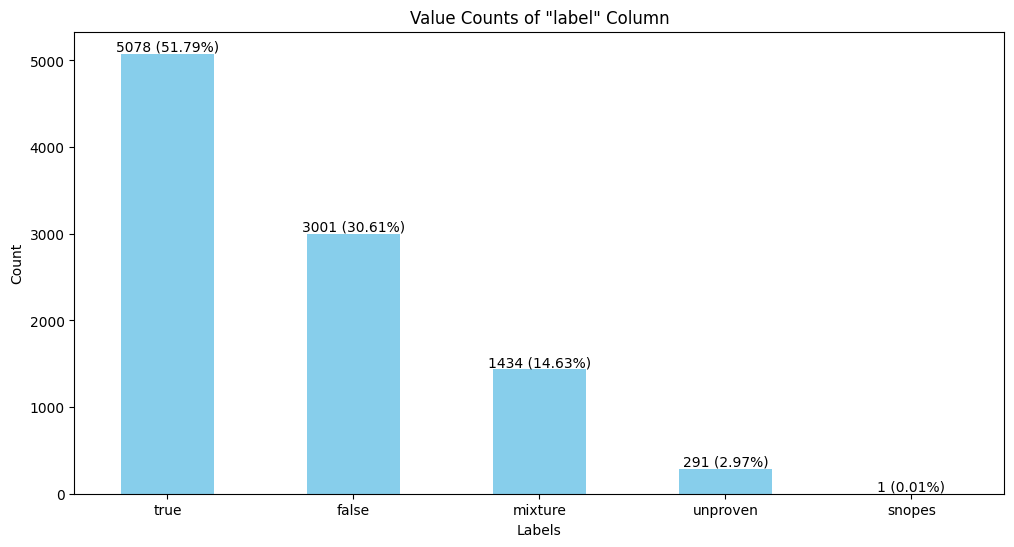

In [12]:
value_counts = train_df['label'].value_counts()


percentages = train_df['label'].value_counts(normalize=True).mul(100)

plt.figure(figsize=(12, 6))
ax = value_counts.plot(kind='bar', color='skyblue')
plt.title('Value Counts of "label" Column')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=0)

for i, count in enumerate(value_counts):
    ax.text(i, count, f'{count} ({percentages[i]:.2f}%)', ha='center', va='bottom')

plt.show()

As we see, aside from true and false articles, there is mixture between unproven and snopes label. For our usecase we are only going to use "true" and "false" labels as the other labels are not clearly explained by the author of the dataset. We asume as the dataset is more for explainable fact checking rather than true or false there is cases that an argument can be made and is not between true and false. 

In [13]:
train_df = train_df[train_df['label'].isin(['unproven', 'mixture', 'snopes']) == False]

train_df["label"].value_counts()

label
true     5078
false    3001
Name: count, dtype: int64

Now we have a df only with true/false labels

Lets visualize the distribution of topics to see possible clusters on the data and the different topics it covers

In [14]:
subjects_series = train_df["subjects"].str.split(',').explode().str.strip().replace('', pd.NA).dropna()

# Calculate the total number of subjects
total_subjects = len(subjects_series)

# Calculate the percentage of each subject
subject_counts = subjects_series.value_counts()
subject_percentages = subject_counts / total_subjects * 100

# Get the top 20 subjects by percentage
top20_subjects = subject_percentages.head(20)

# Calculate the percentage for "Other Subject"
other_subject_percentage = (subject_counts.tail(-20).sum() / total_subjects) * 100

# Add "Other Subject" to the top 20 subjects
top20_subjects["Other Subject"] = other_subject_percentage

# Now, top20_subjects contains the percentages for the top 20 subjects and "Other Subject"
top20_subjects


subjects
Health                   5.042795
Health News              4.601875
General News             3.527363
Politics                 1.782208
Environment              1.674756
Health Care              1.445033
National                 1.411686
U.S. News                1.289414
Coronavirus              1.211605
AP Top News              1.196784
Public Health            1.078217
Science                  0.989292
Fact Checks              0.900367
Public health            0.759569
Business                 0.755863
North America            0.726222
Texas                    0.722517
Facebook Fact-checks     0.700285
International News       0.685464
Virus Outbreak           0.681759
Other Subject           68.816925
Name: count, dtype: float64

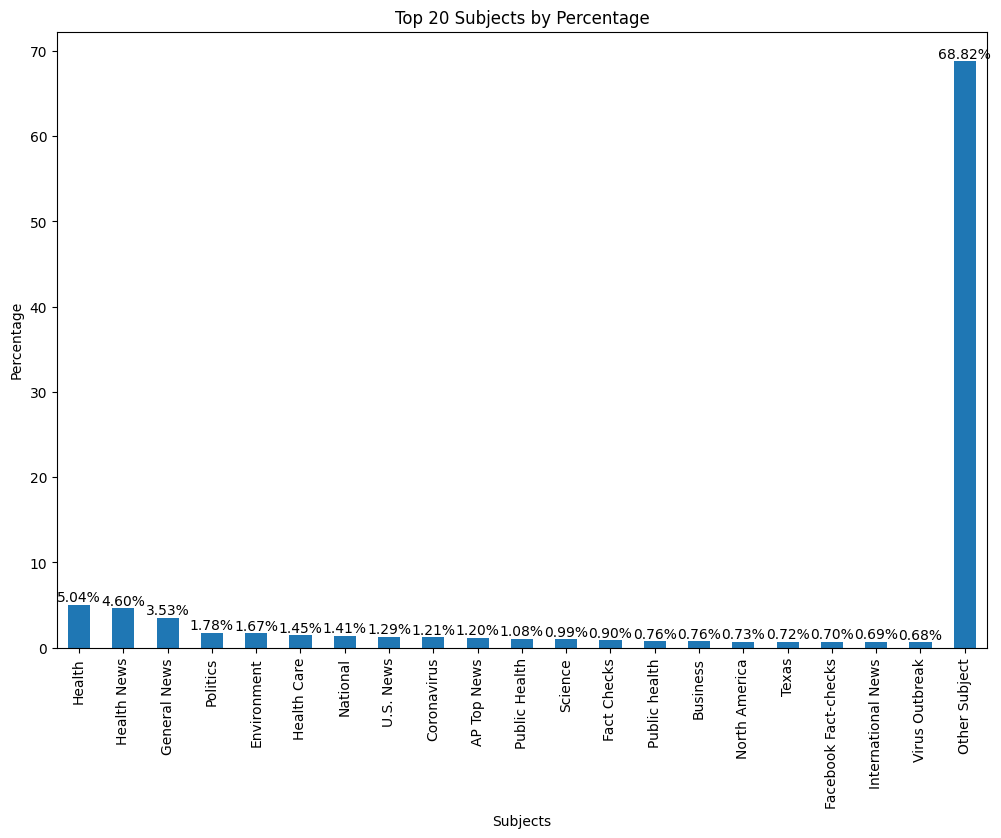

Total number of different subjects: 26989


In [15]:
subjects_series = train_df["subjects"].str.split(',').explode().str.strip().replace('', pd.NA).dropna()

# Calculate the total number of subjects
total_subjects = len(subjects_series)

# Calculate the percentage of each subject
subject_counts = subjects_series.value_counts()
subject_percentages = subject_counts / total_subjects * 100

# Get the top 20 subjects by percentage
top20_subjects = subject_percentages.head(20)

# Calculate the percentage for "Other Subject"
other_subject_percentage = (subject_counts.tail(-20).sum() / total_subjects) * 100

# Add "Other Subject" to the top 20 subjects
top20_subjects["Other Subject"] = other_subject_percentage

# Plot the bar chart
plt.figure(figsize=(12, 8))
ax = top20_subjects.plot(kind='bar')
plt.title('Top 20 Subjects by Percentage')
plt.xlabel('Subjects')
plt.ylabel('Percentage')

# Add the percentages on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()

# Display the total number of different subjects
print(f'Total number of different subjects: {total_subjects}')

# subject_percentages = top20_subjects / len(subjects_series) * 100

We can see there is a wide range of subjects (4k+) this could represent possible clusters. The majority of the subjects represent less than 1%, this amounts to almost the 70% percentage of the subjects. Looking at the subjects can give us a general idea on what the dataset represent. Methods to classify the subjects by the dataset creators are unkwon.

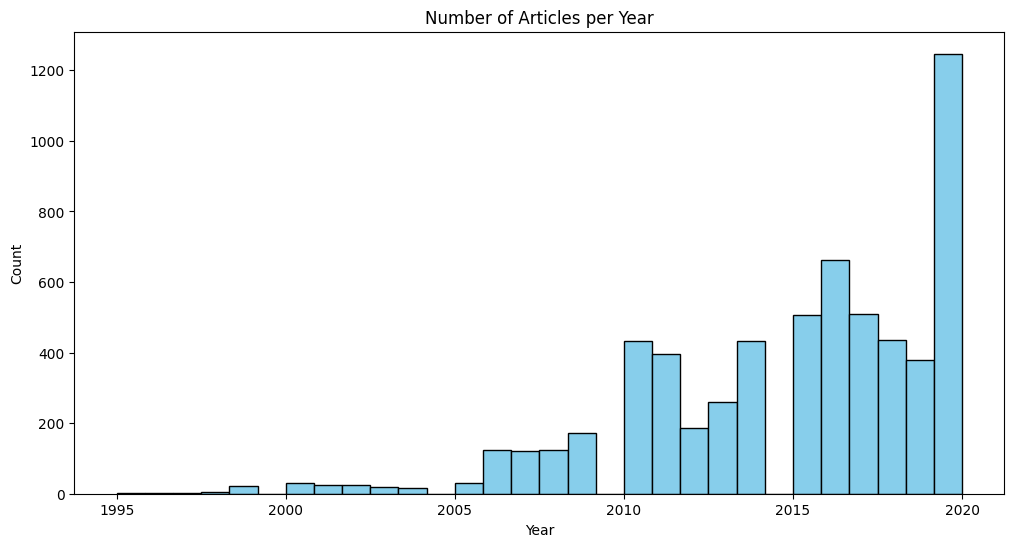

In [16]:
def extract_year(date_string):
    date_formats = ["%B %d, %Y", "%d %B %Y", "%Y-%m-%d"]
    
    for format in date_formats:
        try:
            return pd.to_datetime(date_string, format=format).year
        except ValueError:
            continue

    return None

plt.figure(figsize=(12, 6))
train_df['date_published'].apply(extract_year).plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.title('Number of Articles per Year')
plt.xlabel('Year')
plt.ylabel('Count')

plt.show()

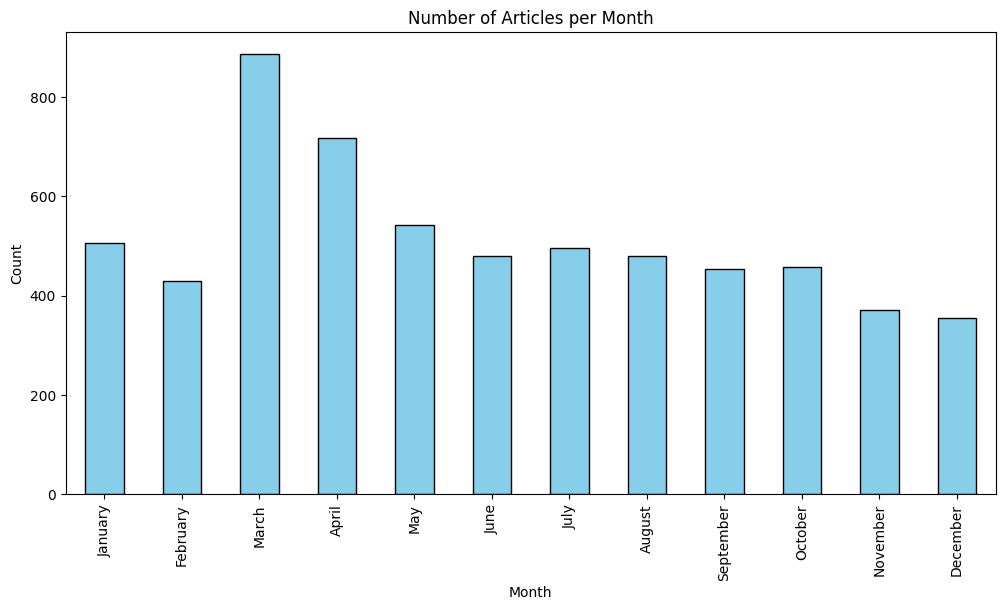

In [17]:

def extract_month(date_string):
    date_formats = ["%B %d, %Y", "%d %B %Y", "%Y-%m-%d"]
    
    for format in date_formats:
        try:
            return pd.to_datetime(date_string, format=format).month
        except ValueError:
            continue

    return None

plt.figure(figsize=(12, 6))
monthly_counts = train_df['date_published'].apply(extract_month).value_counts().sort_index()
monthly_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Articles per Month')
plt.xlabel('Month')
plt.ylabel('Count')

months = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
plt.xticks(monthly_counts.index - 1, [months[int(i) - 1] for i in monthly_counts.index])

plt.show()

As wee see there is more representation in the dataset by a larger number of articles in recent years, with a clear diffrence of articles in 2020, that can be explained by COVID19. If we go back from 2020 to 1996 we can see that there is less article as we go down. In the next cell we can see there is almost 2k rows without date. Overall this notion is useful to have in mind to have a sense of when the model can be more precise.

Lets visualize the different sources the articles where extracted from. With this we can get a hint in possible biases the dataset will have.

/tmp/ipykernel_167144/4049416196.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, top_10_sources[i] + 0.5, f'{v:.2f}%', ha='center')


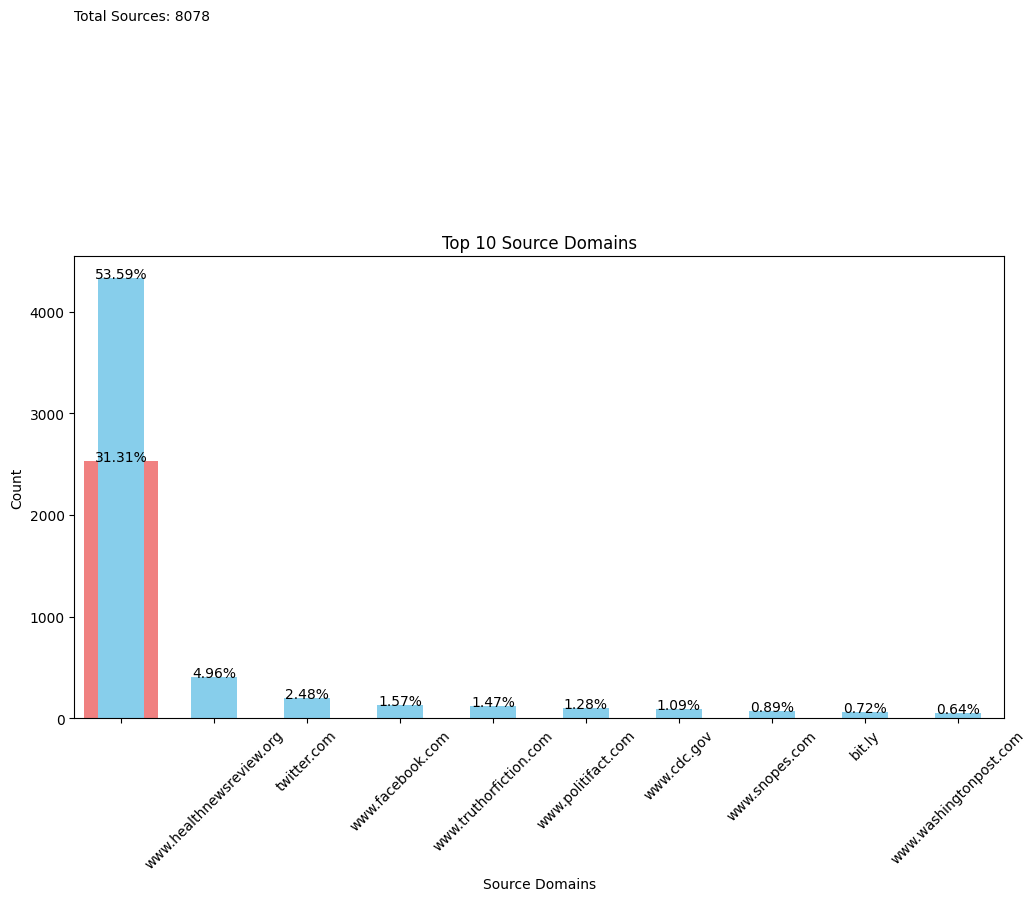

In [18]:

import pandas as pd
import matplotlib.pyplot as plt
from urllib.parse import urlparse


def extract_domain(url):
    if url and not pd.isna(url):
        try:
            parsed_url = urlparse(url)
            domain = parsed_url.netloc
            return domain
        except:
            return None
    return None



source_counts = train_df['sources'].apply(extract_domain).value_counts()

top_10_sources = source_counts.head(10)

total_sources = source_counts.sum()
top_10_percentages = (top_10_sources / total_sources) * 100

other_sources_count = total_sources - top_10_sources.sum()
other_percentage = (other_sources_count / total_sources) * 100

plt.figure(figsize=(12, 6))

plt.bar('Other', other_sources_count, color='lightcoral')
plt.text('Other', other_sources_count + 0.5, f'{other_percentage:.2f}%', ha='center')

top_10_sources.plot(kind='bar', color='skyblue')
plt.title('Top 10 Source Domains')
plt.xlabel('Source Domains')
plt.ylabel('Count')
plt.xticks(rotation=45)

for i, v in enumerate(top_10_percentages):
    plt.text(i, top_10_sources[i] + 0.5, f'{v:.2f}%', ha='center')

plt.text(-0.5, other_sources_count + top_10_sources.max() + 10, f'Total Sources: {total_sources}', ha='left')

plt.show()

As we see there is a wide range of different sources. The top 10 does not represent the majority of the dataset, as there is more percentage of sources in "others" (seen in red bar). More than 80% percent of the sources column amounts to "others" and articles without their sources. The top article provided is Health review which can be said is a relaible source of information. The second most represented source is twitter which can be said that is a reliable source of misinformation, which is useful to help identify this type of information. More than 50% of the articles have not cited the source, this can pouse a problem if we were to identify individually hwere the article come, one can say that we should remove articles that not cite the source but this account of 50% of the dataset which will leave us without too much information

# Clean the Data

In [19]:
train_df = pd.read_table("../../../data/health_fact/original/train.tsv")
test_df = pd.read_table("../../../data/health_fact/original/test.tsv")
dev_df = pd.read_table("../../../data/health_fact/original/dev.tsv")

In [20]:
train_df['label'].replace(['mixture', 'unproven', 'snopes'], np.nan, inplace=True)
test_df['label'].replace(['mixture', 'unproven', 'snopes'], np.nan, inplace=True)
dev_df['label'].replace(['mixture', 'unproven', 'snopes'], np.nan, inplace=True)

#### Visualize NaN val

In [21]:
train_df.isnull().sum()

claim_id             0
claim                8
date_published    1937
explanation          8
fact_checkers       11
main_text           26
sources             28
label             1753
subjects            28
dtype: int64

 <span style="font-size: 16px;"> We can see that pandas is not detecting the missing values in the object type (strings), due to with the method head  there was empty values. So we will proceed to substitute the empty values to NaN type. </span>


changing empty values to NaN values and visualize them as a percentatge

In [22]:
train_df =  train_df.replace(r'^(?=\s*$)', np.nan, regex=True)
print("total Nan values:")
print(train_df.isnull().sum())
print("-----------------")
print("percentatge missing values:")
print(round(train_df.isnull().sum() / train_df.shape[0]* 100 , 2))

total Nan values:
claim_id             0
claim                8
date_published    1942
explanation          9
fact_checkers     2233
main_text           26
sources           4578
label             1753
subjects           801
dtype: int64
-----------------
percentatge missing values:
claim_id           0.00
claim              0.08
date_published    19.75
explanation        0.09
fact_checkers     22.71
main_text          0.26
sources           46.56
label             17.83
subjects           8.15
dtype: float64


In [23]:
posible_drop_columns_df = train_df[['date_published', 'fact_checkers',  'sources']]
posible_drop_columns_df.head()

,date_published,fact_checkers,sources
0,"April 26, 2015",Katie Sanders,https://www.wsj.com/articles/clinton-foundatio...
1,"October 18, 2011",NaN,NaN
2,"September 28, 2016","Mary Chris Jaklevic,Steven J. Atlas, MD, MPH,K...",https://www.healthnewsreview.org/wp-content/up...
3,"November 8, 2011",NaN,http://clinicaltrials.gov/ct2/results?term=can...
4,"September 20, 2010",NaN,NaN


searching correlation of missing values

<Axes: >

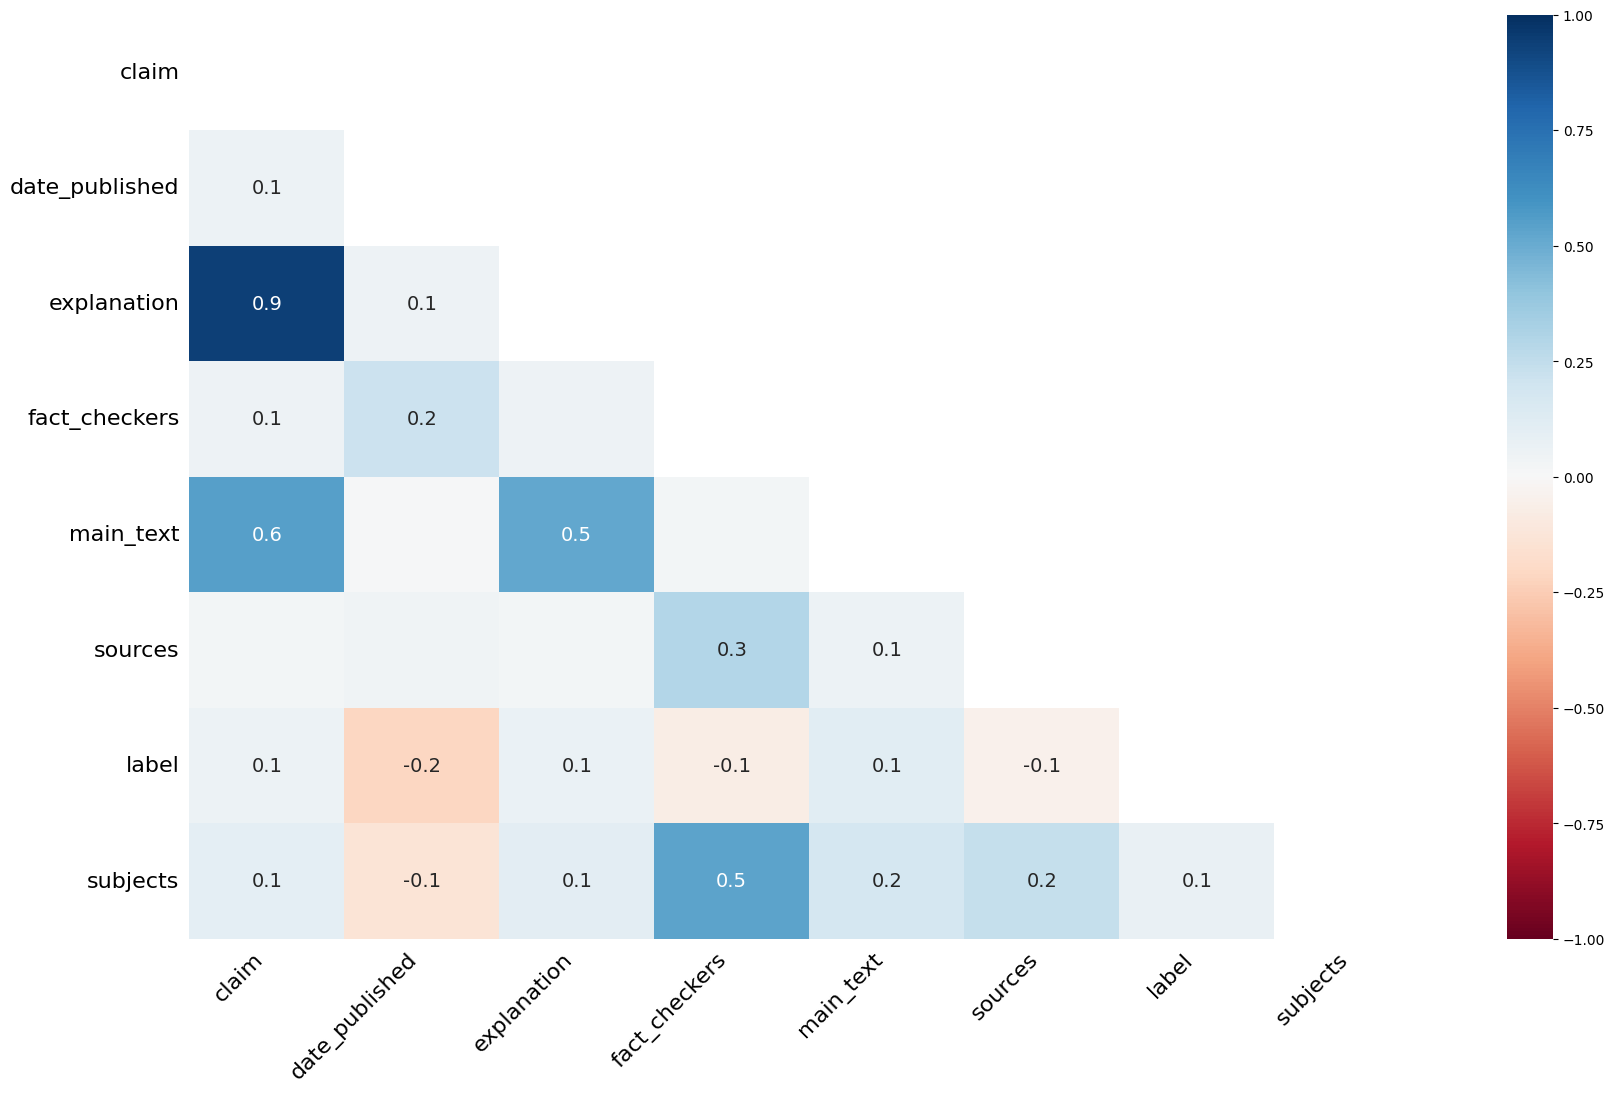

In [24]:
import missingno as msno

msno.heatmap(train_df)

<Axes: >

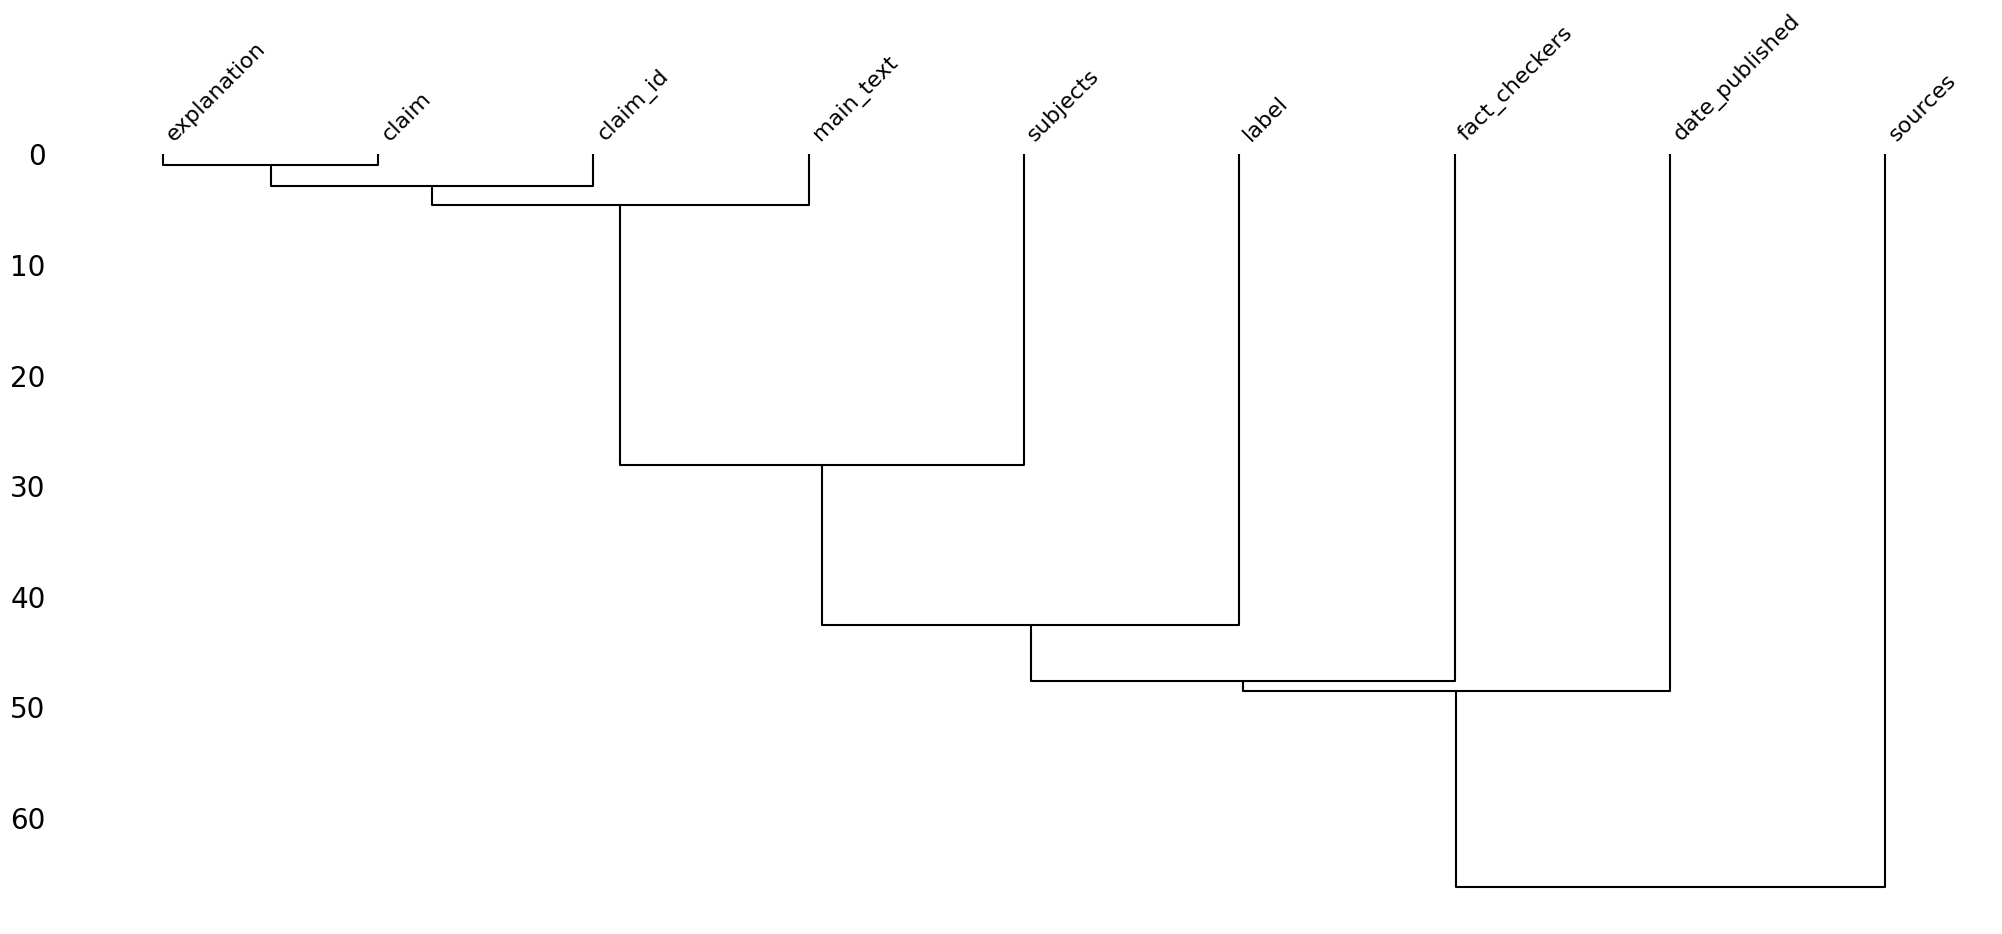

In [25]:
msno.dendrogram(train_df)

In [26]:
missing_data_df = pd.DataFrame(0,columns=posible_drop_columns_df.columns, index="missing data with " + posible_drop_columns_df.columns)


for data in missing_data_df:
    missing_data_df[data]['missing data with date_published'] = posible_drop_columns_df[(posible_drop_columns_df[data].isnull() & posible_drop_columns_df['date_published'].isnull())].shape[0]
    missing_data_df[data]['missing data with fact_checkers'] = posible_drop_columns_df[(posible_drop_columns_df[data].isnull() & posible_drop_columns_df['fact_checkers'].isnull())].shape[0]
    missing_data_df[data]['missing data with sources'] =  posible_drop_columns_df[(posible_drop_columns_df[data].isnull() & posible_drop_columns_df['sources'].isnull())].shape[0]
    
missing_data_df["date_published"]["missing data with fact_checkers"]

790

In [27]:
percentatge_missing_data_df = pd.DataFrame(0,columns=posible_drop_columns_df.columns, index="percent of missing data with " + posible_drop_columns_df.columns)


for data in percentatge_missing_data_df:
    percentatge_missing_data_df[data]['percent of missing data with date_published'] = (posible_drop_columns_df[(posible_drop_columns_df[data].isnull() & posible_drop_columns_df['date_published'].isnull())].shape[0] / posible_drop_columns_df[posible_drop_columns_df['date_published'].isnull()].shape[0] * 100)
    percentatge_missing_data_df[data]['percent of missing data with fact_checkers'] = (posible_drop_columns_df[(posible_drop_columns_df[data].isnull() & posible_drop_columns_df['fact_checkers'].isnull())].shape[0] / posible_drop_columns_df[posible_drop_columns_df['fact_checkers'].isnull()].shape[0] * 100)
    percentatge_missing_data_df[data]['percent of missing data with sources'] =  (posible_drop_columns_df[(posible_drop_columns_df[data].isnull() & posible_drop_columns_df['sources'].isnull())].shape[0] / posible_drop_columns_df[posible_drop_columns_df['sources'].isnull()].shape[0] * 100)
    
percentatge_missing_data_df

/tmp/ipykernel_167144/3770277311.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '35.37841468875952' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  percentatge_missing_data_df[data]['percent of missing data with fact_checkers'] = (posible_drop_columns_df[(posible_drop_columns_df[data].isnull() & posible_drop_columns_df['fact_checkers'].isnull())].shape[0] / posible_drop_columns_df[posible_drop_columns_df['fact_checkers'].isnull()].shape[0] * 100)
/tmp/ipykernel_167144/3770277311.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percentatge_missing_data_df[data]['percent of missing data with date_published'] = (posible_drop_columns_df[(posible_drop_columns_df[data].isnull() & posible_dr

,date_published,fact_checkers,sources
percent of missing data with date_published,100.000000,40.679712,50.617920
percent of missing data with fact_checkers,35.378415,100.000000,73.757277
percent of missing data with sources,21.472259,35.976409,100.000000


Checking how many rows we will delete if

In [28]:
rows_not_shared_date_published = (missing_data_df["date_published"]["missing data with date_published"] - missing_data_df["date_published"]["missing data with fact_checkers"] )
rows_not_shared_fact_checkers = (missing_data_df["fact_checkers"]["missing data with fact_checkers"] - missing_data_df["fact_checkers"]["missing data with date_published"])
total_rows_deleted  = rows_not_shared_date_published + rows_not_shared_fact_checkers
f"deleted rows if we delete date_published NaN and fact_checkers NaN: {total_rows_deleted},  rows remain in dataset {train_df.shape[0] - total_rows_deleted} "

'deleted rows if we delete date_published NaN and fact_checkers NaN: 2595,  rows remain in dataset 7237 '

After exploring the missing data we came with the conclusion that we will drop the column sources and drop all the rows that contains a NaN value

In [29]:
train_df.drop('sources', axis=1, inplace=True)
test_df.drop('sources', axis=1, inplace=True)
dev_df.drop('sources', axis=1, inplace=True)

In [30]:
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)
dev_df.dropna(inplace=True)

Final lenght of train dataset

In [31]:
train_df.shape[0]

4991

#### Cleaned

In [32]:
train_df.to_csv("../../../data/health_fact/clean_dataset/train.csv")
test_df.to_csv("../../../data/health_fact/clean_dataset/test.csv")
dev_df.to_csv("../../../data/health_fact/clean_dataset/dev.csv")